# 15.5 Using TSNE to Visualize the Digits Dataset in 3D

In [16]:
# Begin by loading the digits dataset
from sklearn.datasets import load_digits

digits = load_digits()

In [17]:
# Create a TSNE object for three dimensions
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=12)

In [18]:
# Reduce the features for three dimensions
reduced_data = tsne.fit_transform(digits.data)

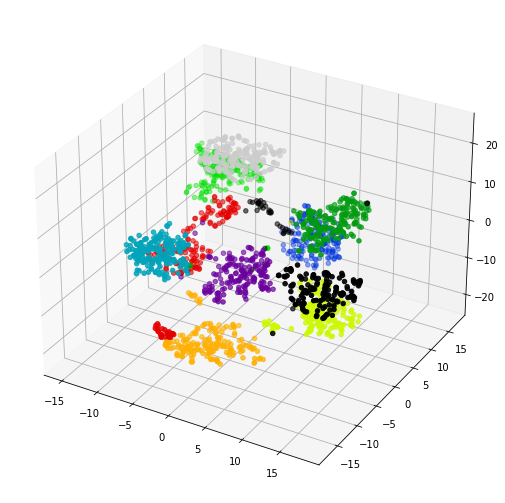

In [20]:
# Create the 3D scatterplot using TSNE and Matplotlib's Axes3D
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure(figsize=(9, 9))

axes = figure.add_subplot(111, projection ='3d')

dots = axes.scatter(xs=reduced_data[:, 0], ys=reduced_data[:, 1], zs=reduced_data[:, 2], 
                    c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

# 15.17 Binary Classification with the Breast Cancer Dataset

In [36]:
# Begin by loading the breast cancer dataset
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

In [37]:
# Break the data into a training set and a testing set for the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=11)

In [46]:
# Creating the KNeighborsClassifier estimator
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [55]:
# Check for a classification estimaor's accuracy via a confusion matrix
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [56]:
# Produce a table of classification metrics based on expected and predicted values
from sklearn.metrics import classification_report

names = [str(breast_cancer) for data in breast_cancer.target_names]

In [57]:
# Create a KFold object to help perform training and testing cycles
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [58]:
# Use cross_val_score to train and test model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=knn, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

In [63]:
# import estimators for testing
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

In [64]:
# Create dictionary for our estimators
estimators = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(max_iter=5000)}

In [66]:
# Execute models for each of our estimators
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
        X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%
  LogisticRegression: mean accuracy=95.26%; standard deviation=2.72%
